# Fashion_Trend_Analysis


##  Import Libraries

In [3]:
!pip install squarify


In [4]:
import numpy as np 
import pandas as pd 
import seaborn as sb
import matplotlib.pyplot as plt 
import re 
import warnings
import squarify

In [5]:
#plt.style.use('ggplot')  # You can also try: 'ggplot', 'seaborn-darkgrid', 'fivethirtyeight', etc.

In [6]:
warnings.filterwarnings("ignore")

#### Insight :
- Hinding the FutureWarning

### Load & Preview Dataset

In [9]:
df = pd.read_csv("../DataSets/Fashion_Trends.csv")
df

,Brand,Description,Image_URL,Product_ID,Discount_Price (in Rs.),Original_Price (in Rs.),Product_URL,Category_by_gender,Category
0,performax,Typographic Print Track Pants with Insert Pockets,https://assets.ajio.com/medias/sys_master/root...,441136763008,974,"1,299",https://trends.ajio.com/performax-typographic-...,Men,Activewear
1,performax,Low-Top Lace-Up Sports Shoes,https://assets.ajio.com/medias/sys_master/root...,450137679013,"1,499","1,499",https://trends.ajio.com/performax-low-top-lace...,Men,Activewear
2,teamspirit,Colorblock Crew-Neck T-shirt,https://assets.ajio.com/medias/sys_master/root...,441133214008,461,549,https://trends.ajio.com/teamspirit-colorblock-...,Men,Activewear
3,performax,Camouflage Print Joggers with Insert Pockets,https://assets.ajio.com/medias/sys_master/root...,441134776020,"1,189","1,699",https://trends.ajio.com/performax-camouflage-p...,Men,Activewear
4,teamspirit,Reflective Colourblock Crew-Neck T-shirt,https://assets.ajio.com/medias/sys_master/root...,441136539020,425,599,https://trends.ajio.com/teamspirit-reflective-...,Men,Activewear
...,...,...,...,...,...,...,...,...,...
31577,ajio,Printed Top with Raglan Sleeves,https://assets.ajio.com/medias/sys_master/root...,460328028004,"1,299","1,299",https://trends.ajio.com/ajio-printed-top-with-...,Women,Westernwear
31578,ajio,Striped Cropped Pants with Belt,https://assets.ajio.com/medias/sys_master/root...,460328036004,"2,099","2,099",https://trends.ajio.com/ajio-striped-cropped-p...,Women,Westernwear
31579,ajio,Striped City Shorts with Belt,https://assets.ajio.com/medias/sys_master/root...,460328005002,"1,499","1,499",https://trends.ajio.com/ajio-striped-city-shor...,Women,Westernwear
31580,ajio,Denim Jacket with Frayed Hemline,https://assets.ajio.com/medias/sys_master/root...,460328651009,"2,999","2,999",https://trends.ajio.com/ajio-denim-jacket-with...,Women,Westernwear


### Data Preparation:

In [11]:
df.isnull().sum()

Brand                      0
Description                0
Image_URL                  0
Product_ID                 0
Discount_Price (in Rs.)    0
Original_Price (in Rs.)    0
Product_URL                0
Category_by_gender         0
Category                   0
dtype: int64

## 🧠 Insight
- The dataset has no missing (null) values in any column.
- This means the data is complete and clean, which simplifies analysis .

In [13]:
df.drop([ "Image_URL","Product_URL"],axis = 1 , inplace = True )

## 🧠 Insight
- Remove the unwanted columns from the data.

In [15]:
df["Discount_Price (in Rs.)"] = df["Discount_Price (in Rs.)"].replace("[, ]","",regex=True).astype("int64")
df["Original_Price (in Rs.)"] = df["Original_Price (in Rs.)"].replace("[, ]","",regex=True).astype("int64")

## 🧠 Insight
- Renaming columns for better readability and easier access

In [17]:
df = df.rename(columns ={ 'Discount_Price (in Rs.)' : 'Discount_Price', 
                         'Original_Price (in Rs.)' : 'Original_Price',
                         'Category_by_gender' : 'Gender'} )

## 🧠 Insight
 - Column names were renamed for simplicity and consistency, making the dataset cleaner and easier to work with during analysis and visualization.

### Checking the data types

In [20]:
df.dtypes

Brand             object
Description       object
Product_ID         int64
Discount_Price     int64
Original_Price     int64
Gender            object
Category          object
dtype: object

## Feature Engineering 
- Adding columns that helps to undestanding the data.

In [22]:
df['Discounted_amount'] = df['Original_Price'] - df['Discount_Price']

In [23]:
df['Discount_Percentage'] =( df['Discounted_amount']/df['Original_Price']) * 100
df['Discount_Percentage'] = df['Discount_Percentage'].round(2)

In [24]:
df['ProductName'] = df['Description'].apply(lambda desc: re.split(r'\bwith\b|\band\b|\bin\b|\bof\b', desc, maxsplit=1)[0].strip())

df["Product_Name"] = df["ProductName"].astype(str).apply(lambda x: ' '.join(x.split()[-2:]))


- This helps to extract and clean product names from Description column.

In [26]:
df = df.drop('ProductName',axis = 1)

In [27]:
df

,Brand,Description,Product_ID,Discount_Price,Original_Price,Gender,Category,Discounted_amount,Discount_Percentage,Product_Name
0,performax,Typographic Print Track Pants with Insert Pockets,441136763008,974,1299,Men,Activewear,325,25.02,Track Pants
1,performax,Low-Top Lace-Up Sports Shoes,450137679013,1499,1499,Men,Activewear,0,0.00,Sports Shoes
2,teamspirit,Colorblock Crew-Neck T-shirt,441133214008,461,549,Men,Activewear,88,16.03,Crew-Neck T-shirt
3,performax,Camouflage Print Joggers with Insert Pockets,441134776020,1189,1699,Men,Activewear,510,30.02,Print Joggers
4,teamspirit,Reflective Colourblock Crew-Neck T-shirt,441136539020,425,599,Men,Activewear,174,29.05,Crew-Neck T-shirt
...,...,...,...,...,...,...,...,...,...,...
31577,ajio,Printed Top with Raglan Sleeves,460328028004,1299,1299,Women,Westernwear,0,0.00,Printed Top
31578,ajio,Striped Cropped Pants with Belt,460328036004,2099,2099,Women,Westernwear,0,0.00,Cropped Pants
31579,ajio,Striped City Shorts with Belt,460328005002,1499,1499,Women,Westernwear,0,0.00,City Shorts
31580,ajio,Denim Jacket with Frayed Hemline,460328651009,2999,2999,Women,Westernwear,0,0.00,Denim Jacket


In [28]:
df.describe()

,Product_ID,Discount_Price,Original_Price,Discounted_amount,Discount_Percentage
count,3.158200e+04,31582.000000,31582.000000,31582.000000,31582.000000
mean,4.439001e+11,929.759832,1418.094769,488.334938,32.979031
std,5.715579e+09,727.207471,945.684511,544.062245,24.667178
min,4.200088e+11,75.000000,149.000000,0.000000,0.000000
25%,4.411142e+11,479.000000,799.000000,0.000000,0.000000
50%,4.411360e+11,735.000000,1299.000000,356.000000,35.040000
75%,4.501273e+11,1199.000000,1799.000000,749.000000,50.930000
max,4.608526e+11,16999.000000,19999.000000,11999.000000,85.010000


# Price Segmentation Analysis

In [30]:
# Choose Original Price for segmentation
price = df['Original_Price']

# Define price ranges
def price_segment(price):
    if price < 500:
        return 'Low (<₹500)'
    elif 500 <= price < 1500:
        return 'Mid (₹500–₹1499)'
    elif 1500 <= price < 4000:
        return 'Premium (₹1500–₹3999)'
    else:
        return 'Luxury (₹4000+)'

# Apply segmentation
df['Price_Segment'] = df['Original_Price'].apply(price_segment)

### Product Distribution by Price Segment

Price_Segment
Mid (₹500–₹1499)         18237
Premium (₹1500–₹3999)     9872
Low (<₹500)               2972
Luxury (₹4000+)            501
Name: count, dtype: int64


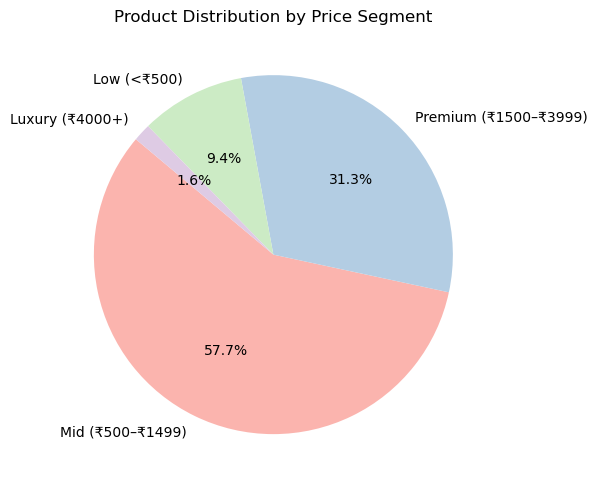

In [32]:
price_tiers = df['Price_Segment'].value_counts()
print(price_tiers)

plt.figure(figsize=(6,6))
price_tiers.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Pastel1.colors)
plt.title('Product Distribution by Price Segment')
plt.ylabel('')
plt.tight_layout()
plt.show()


## 🔍 Insights:
#### - Mid - Largest segment 

#### - Premium - Strong presence 

#### - Low - Smaller segment 

#### - Luxury - Smallest segment  

### Which is the most popular category for each gender in each price tier?

In [35]:
common_cat_tier_gender = df.groupby(['Price_Segment', 'Gender'])['Category'].value_counts().groupby(level=[0,1]).nlargest(1)
common_cat_tier_gender

Price_Segment          Gender  Price_Segment          Gender  Category   
Low (<₹500)            Men     Low (<₹500)            Men     Topwear         515
                       Women   Low (<₹500)            Women   Westernwear     648
Luxury (₹4000+)        Men     Luxury (₹4000+)        Men     Footwear        135
                       Women   Luxury (₹4000+)        Women   Ethnicwear      227
Mid (₹500–₹1499)       Men     Mid (₹500–₹1499)       Men     Topwear        4989
                       Women   Mid (₹500–₹1499)       Women   Westernwear    4611
Premium (₹1500–₹3999)  Men     Premium (₹1500–₹3999)  Men     Topwear        1591
                       Women   Premium (₹1500–₹3999)  Women   Ethnicwear     1944
Name: count, dtype: int64

## 🔍  Insights:
#### - Men mostly buy Topwear in all price segments except Luxury.

#### - Women buy Westernwear in Low & Mid ranges, but Ethnicwear in Premium & Luxury.

#### - Luxury Men prefer Footwear.

#### - Ethnicwear is popular among women only in higher price tiers.

#### - Mid-range  has the most product activity for both genders.

### Find premium brands vs. budget brands

In [38]:
# Identify brands with wide or narrow price ranges
brand_price_segment = df.groupby('Brand')['Original_Price'].agg(['mean', 'min', 'max', 'count']).sort_values(by='mean', ascending=False)

# Top 20 brand with price_segment
print(brand_price_segment.head(20))

                         mean   min    max  count
Brand                                            
k-swiss          13213.285714  9499  14999      7
florsheim         6661.666667  5995   6995      3
saucony           5499.000000  5499   5499      2
louis-philippe    5456.142857  3999   7499      7
skechers          5344.833333  4299   5999     24
gola              5299.000000  3799   5999      8
clarks            4451.631579  2799  10999    152
ruosh             4423.333333  3290   5490      3
alberto-torresi   3995.000000  2495   5995      9
puma              3785.956522   499   6499     69
swadesh           3486.719298  1199   8999     57
vivitka           3464.517241  2499   4499     58
reebok            3449.000000  3299   3599      4
woodland          3326.746032  1995   4795     63
buckaroo          3237.500000  1895   4695     40
crocs             3213.181818  1995   4995     22
nez               3159.090909  1990   4990     55
biba              3075.800000   599  13950    485


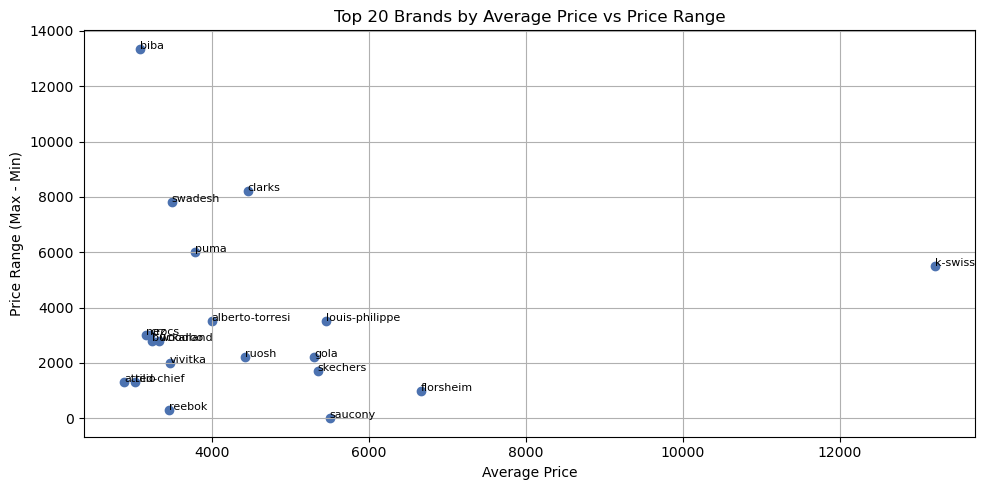

In [39]:
brand_price_segment['range'] = brand_price_segment['max'] - brand_price_segment['min']
top_brands = brand_price_segment.head(20)
plt.figure(figsize=(10, 5))
plt.scatter(top_brands['mean'], top_brands['range'], color='#4C72B0')
# Add brand names as labels
for brand in top_brands.index:
    plt.text(top_brands.loc[brand, 'mean'],
             top_brands.loc[brand, 'range'],
             brand, fontsize=8)

plt.xlabel('Average Price')
plt.ylabel('Price Range (Max - Min)')
plt.title('Top 20 Brands by Average Price vs Price Range')
plt.grid(True)
plt.tight_layout()
plt.show()


## 🧠 Insight
#### - Premium brands like k-swiss have high average prices.

#### - Some brands offer a wide price range (e.g., clarks).

#### - Brands with many products (like clarks) have diverse offerings.


### Find the top brand (with highest product count) in each Price_Segment 

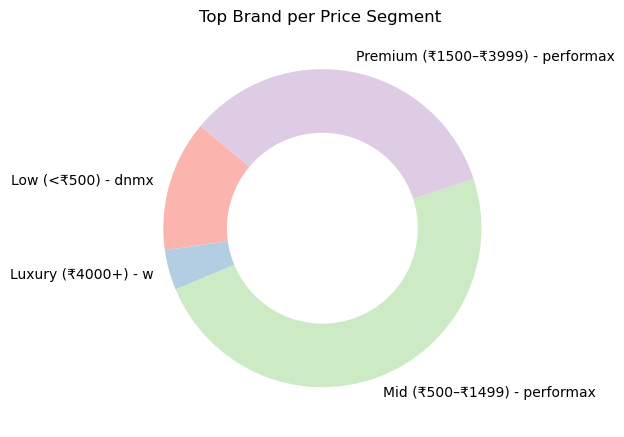

,Price_Segment,Brand,Count
0,Low (<₹500),dnmx,453
51,Luxury (₹4000+),w,139
80,Mid (₹500–₹1499),performax,1657
210,Premium (₹1500–₹3999),performax,1153


In [42]:
# Step-by-step clean version
top_brand_per_tier = (
    df.groupby(['Price_Segment'])['Brand']
    .value_counts()
    .reset_index(name='Count')  # <-- make it a DataFrame
    .sort_values(['Price_Segment', 'Count'], ascending=[True, False])
    .drop_duplicates(subset='Price_Segment')  # keep top 1 per tier
)

# visualization 
labels = top_brand_per_tier['Price_Segment'] + ' - ' + top_brand_per_tier['Brand']
sizes = top_brand_per_tier['Count']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, wedgeprops=dict(width=0.4), startangle=140, colors=plt.cm.Pastel1.colors)
plt.title("Top Brand per Price Segment ")
plt.tight_layout()
plt.show()

top_brand_per_tier

## 🔍 Insights: 
#### - Low - Top Brand: dnmx

#### - Mid - Top Brand: performax

#### - Premium - Top Brand: performax
#### - Luxury - Top Brand: w


### To list product names that belong to a reasonable price range

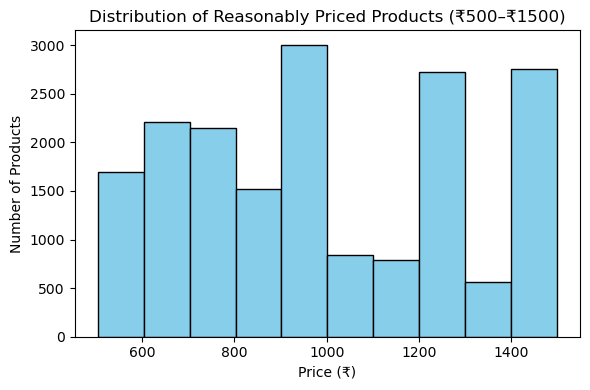

         Product_Name  Original_Price
0         Track Pants            1299
1        Sports Shoes            1499
2   Crew-Neck T-shirt             549
4   Crew-Neck T-shirt             599
5         Rib Joggers             599
7   Crew-Neck T-shirt             699
8   Crew-Neck T-shirt             699
9         charcoal xs             599
10        Track Pants            1299
11            Joggers            1299


In [45]:
# Filter products in the reasonable price range
reasonable_products = df[(df['Original_Price'] >= 500) & (df['Original_Price'] <= 1500)]

# Show only Product Name and Price
reasonable_product_list = reasonable_products[['Product_Name', 'Original_Price']]

#visualization
plt.figure(figsize=(6, 4))
plt.hist(reasonable_products['Original_Price'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Reasonably Priced Products (₹500–₹1500)')
plt.xlabel('Price (₹)')
plt.ylabel('Number of Products')
plt.tight_layout()
plt.show()

# Display
print(reasonable_product_list.head(10))  

## 🔍 Insights :
#### - Crew-Neck T-shirts are the most frequent.

#### - Track Pants & Joggers appear multiple times .

#### - Sports Shoes are at the top of this range .


# Discount Strategies Analysis

### Discount Tier Analysis

In [50]:
def discount_tier(p):
    if p == 0:
        return ' No Discount'
    elif p < 20:
        return 'Light (10-20%)'
    elif p < 40:
        return 'Moderate  (20-40%)'
    else:
        return 'Deep (>40%)'

df['Discount_Tier'] = df['Discount_Percentage'].apply(discount_tier)

### Overall Discount Distribution

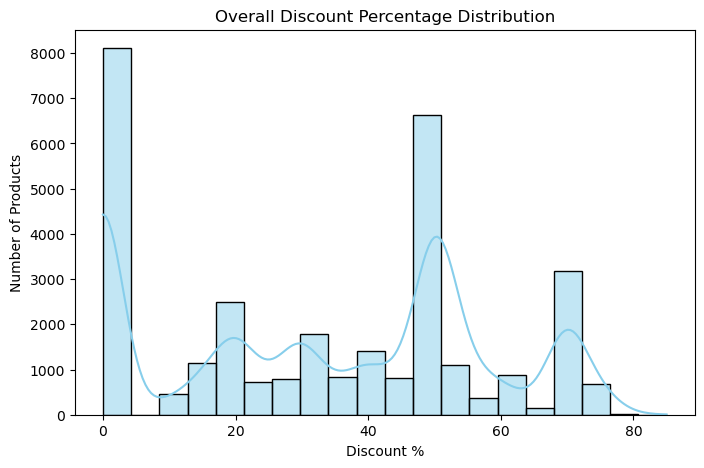

In [52]:
plt.figure(figsize=(8,5))
sb.histplot(df['Discount_Percentage'], bins=20, kde=True, color='skyblue')
plt.title('Overall Discount Percentage Distribution')
plt.xlabel('Discount %')
plt.ylabel('Number of Products')
plt.show()

## 🧠 Insight
#### - Spot common discount ranges (e.g., most Products discounted around 20–50%)

### Average Discount by Brand (To get the top 10 brands with the highest average discount)

Brand
jp-jeans            74.980000
trends              74.978000
avaasa-workwear     74.970000
swadesh             71.953684
lee-cooper-women    70.545000
outryt              70.245439
gola                69.990000
saucony             69.990000
altheory            69.980377
svrnaa              69.980071
Name: Discount_Percentage, dtype: float64


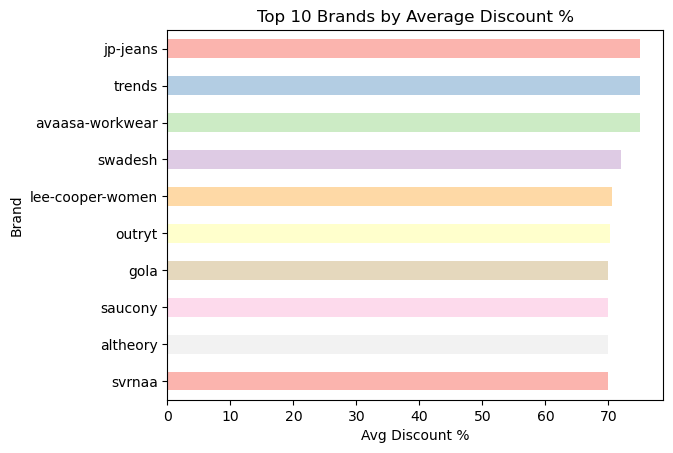

In [55]:
brand_discount = df.groupby('Brand')['Discount_Percentage'].mean().sort_values(ascending=False)
print(brand_discount.head(10))

#  Plot top 10 brands by average discount
brand_discount.head(10).plot(kind='barh', color=plt.cm.Pastel1.colors)
plt.title('Top 10 Brands by Average Discount %')
plt.xlabel('Avg Discount %')
plt.ylabel('Brand')
plt.gca().invert_yaxis()
plt.show()


## 🧠 Insight
#### - The top 10 brands offer very high average discounts, mostly above 69%, indicating aggressive discount strategies.
#### - Brands like jp-jeans and trends lead with discounts around 75%.




### Discounts by Category and Gender

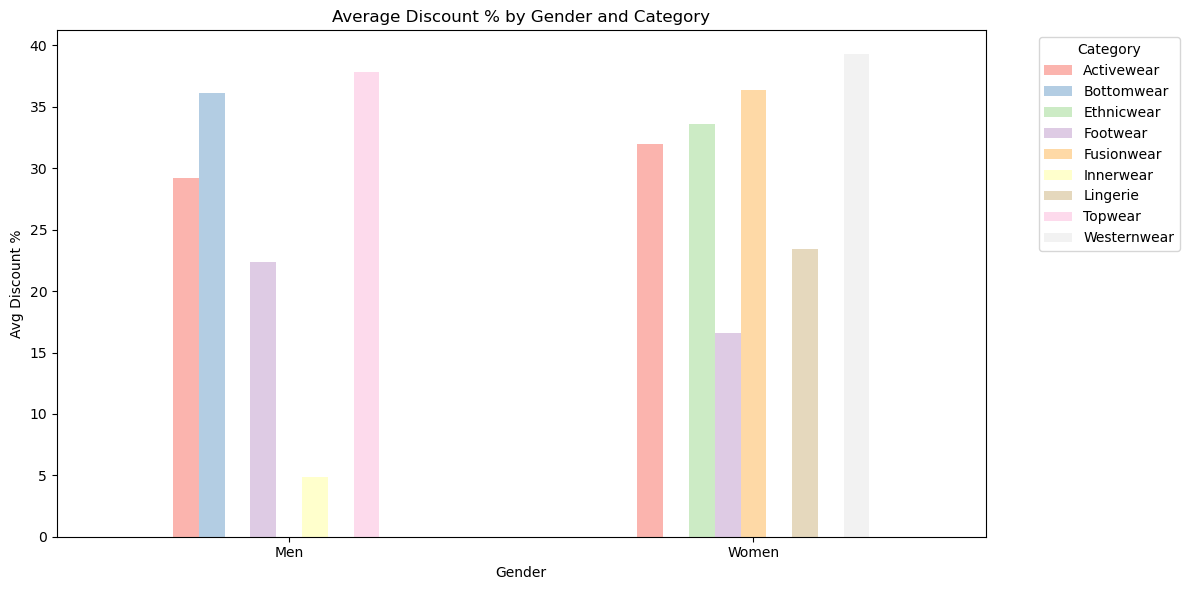

Category,Activewear,Bottomwear,Ethnicwear,Footwear,Fusionwear,Innerwear,Lingerie,Topwear,Westernwear
Gender,,,,,,,,,
Men,29.249675,36.136394,0.000000,22.408299,0.000000,4.835521,0.000000,37.81754,0.000000
Women,31.939575,0.000000,33.613717,16.628862,36.369258,0.000000,23.462677,0.00000,39.270468


In [58]:
cat_gender_discount = df.groupby(['Gender', 'Category'])['Discount_Percentage'].mean().unstack().fillna(0)

cat_gender_discount.plot(kind='bar', figsize=(12,6), color=plt.cm.Pastel1.colors)
plt.title('Average Discount % by Gender and Category')
plt.ylabel('Avg Discount %')
plt.xticks(rotation=0)
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
cat_gender_discount

## 🧠 Insight
#### - Women’s categories generally receive higher average discounts than men’s.

#### - Categories like Westernwear, Fusionwear, and Lingerie (for women) show the highest discount percentages.

#### - Men’s discounts are highest in Topwear and Bottomwear, while Innerwear receives minimal discounts.


### Top 10 Most Discounted Products

                                          Description     Brand  \
21728                     Chunky-Heeled Slip-On Boots   catwalk   
21652       Textured Casual Shoes with Velcro Closure   catwalk   
17334         Textured A-line Kurta with Shirt Collar   swadesh   
21073                     Boat Shoes with Knot Accent   catwalk   
21063                         Animal Print Boat Shoes   catwalk   
24306  Front-Open Embroidered A-line Tunic with Inner   swadesh   
17557   Banarasi Brocade Angarakha with Surplice Neck   swadesh   
24026       Banarasi Brocade Tunic with Attached Slip   swadesh   
19723      Textured Panelled Flared Kurta with Tie-Up   swadesh   
6393              Powell Slip-On Leather Casual Shoes  buckaroo   

       Original_Price  Discount_Price  Discount_Percentage  
21728            3995             599                85.01  
21652            3195             511                84.01  
17334            7999            1600                80.00  
21073            2

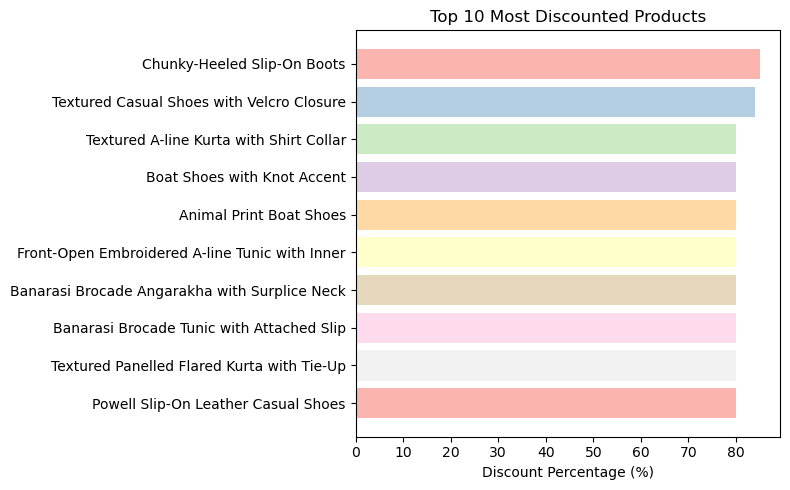

In [77]:
top_discounts = df.sort_values(by='Discount_Percentage', ascending=False)[['Description', 'Brand', 'Original_Price', 'Discount_Price', 'Discount_Percentage']].head(10)
print(top_discounts)

#Visualization
plt.figure(figsize=(8, 5))
plt.barh(top_discounts['Description'], top_discounts['Discount_Percentage'], color=plt.cm.Pastel1.colors)
plt.xlabel("Discount Percentage (%)")
plt.title("Top 10 Most Discounted Products")
plt.gca().invert_yaxis()  # Show highest at the top
plt.tight_layout()
plt.show()

## 🧠 Insight
#### - Catwalk and Swadesh dominate the top 10 most heavily discounted products, offering 80%–85% discounts.

#### - These products span categories like footwear and ethnic wear, suggesting aggressive clearance or promotional pricing.

#### - Such deep discounts may boost short-term sales but can impact brand value or margin if overused.

### Find the number of products in each Discount_Tier and visualize

        Discount_Tier  Product_Count
0         Deep (>40%)          15194
1         No Discount           8107
2  Moderate  (20-40%)           6660
3      Light (10-20%)           1621


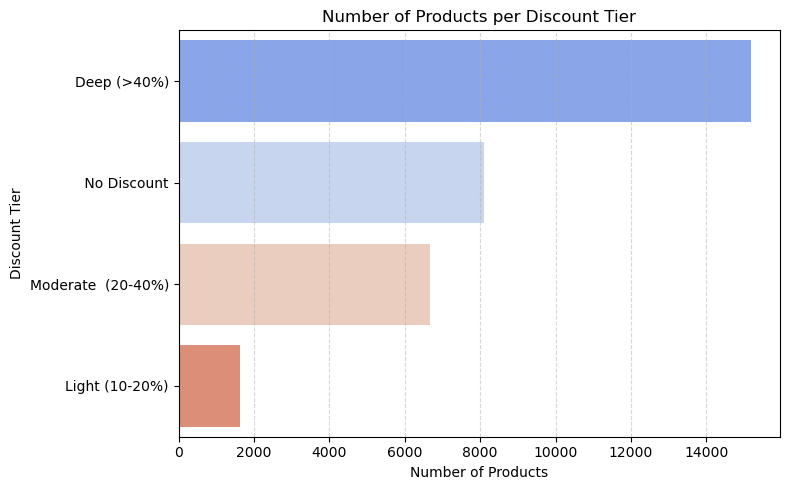

In [91]:
# Count of products per discount tier
discount_tier_counts = df['Discount_Tier'].value_counts().reset_index()
discount_tier_counts.columns = ['Discount_Tier', 'Product_Count']
print(discount_tier_counts)

# Visualization
plt.figure(figsize=(8, 5))
sb.barplot(data=discount_tier_counts, x='Product_Count', y='Discount_Tier', palette='coolwarm')
plt.title('Number of Products per Discount Tier')
plt.xlabel('Number of Products')
plt.ylabel('Discount Tier')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## 🔍 Insights:
#### - Deep discounts (>40%) are most common – 15,194 products.

#### - No discounts still apply to 8,107 products.

#### - Moderate discounts (20–40%) – 6,660 products.

#### - Light discounts (10–20%) are least – only 1,621 products.

####  Most products are either heavily discounted or not discounted at all.

# Gender Focus trend Analysis

### Product Count & Average Discount  by Gender

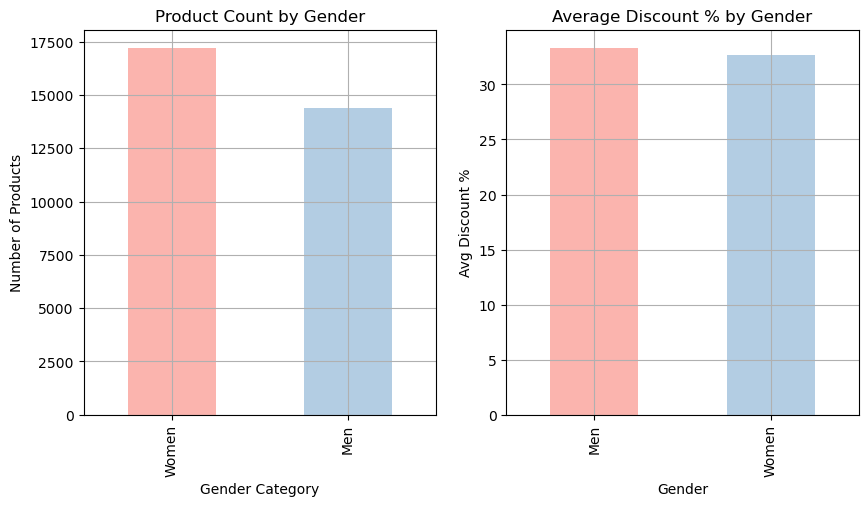

Gender_Counts
 Gender
Women    17207
Men      14375
Name: count, dtype: int64 

 Avg_Discount_Gender
  Gender
Men      33.31903
Women    32.69499
Name: Discount_Percentage, dtype: float64


In [97]:
# Count by gender
gender_counts = df['Gender'].value_counts()


plt.figure(figsize=(10, 5))

# Plot: Product count by gender
 
plt.subplot(1, 2, 1)
gender_counts.plot(kind='bar', color=plt.cm.Pastel1.colors)
plt.title('Product Count by Gender')
plt.xlabel('Gender Category')
plt.ylabel('Number of Products')
plt.grid(True)


# Avg discount by gender
avg_discount_gender = df.groupby('Gender')['Discount_Percentage'].mean()

# Plot: Avg Discount % by Gender
plt.subplot(1, 2, 2)
avg_discount_gender.plot(kind='bar', color=plt.cm.Pastel1.colors)
plt.title('Average Discount % by Gender')
plt.ylabel('Avg Discount %')
plt.grid(True)
plt.show()
print("Gender_Counts\n",gender_counts,"\n\n Avg_Discount_Gender\n ",avg_discount_gender)

## 🧠 Insight
#### - Women's products make up a slightly larger product  than Men products, indicating a stronger market focus or demand.

#### - Men's products receive a slightly higher average discount than Women's products , but the difference is small (~0.63%).

### Average Price Range by Gender

        Original_Price  Discount_Price
Gender                                
Men            1459.13          960.51
Women          1383.82          904.07


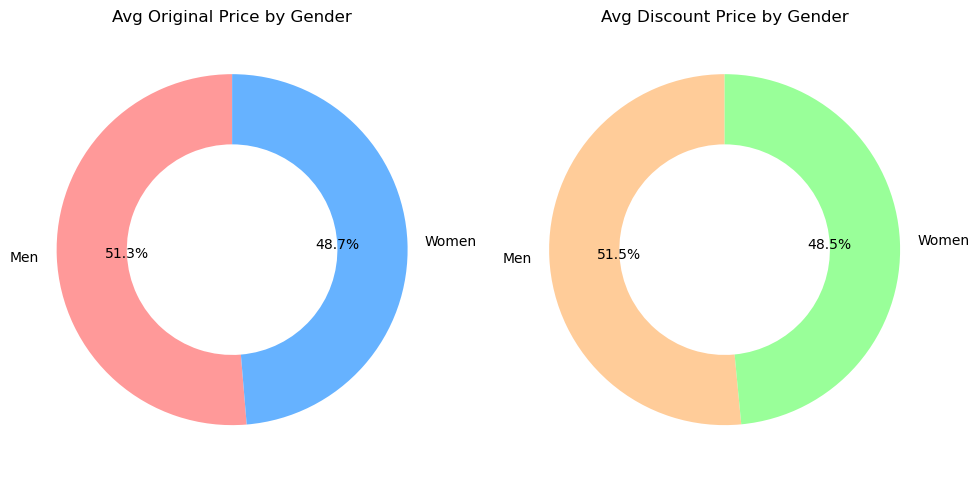

In [101]:
gender_price = df.groupby('Gender')[['Original_Price', 'Discount_Price']].mean().round(2)
print(gender_price)

# Data
labels = gender_price.index.tolist()
original_prices = gender_price['Original_Price']
discount_prices = gender_price['Discount_Price']

# Plot
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Original Price Donut
ax[0].pie(original_prices, labels=labels, autopct='%1.1f%%', startangle=90,
          wedgeprops={'width': 0.4}, colors=['#FF9999', '#66B2FF'])
ax[0].set_title("Avg Original Price by Gender")

# Discount Price Donut
ax[1].pie(discount_prices, labels=labels, autopct='%1.1f%%', startangle=90,
          wedgeprops={'width': 0.4}, colors=['#FFCC99', '#99FF99'])
ax[1].set_title("Avg Discount Price by Gender")

plt.tight_layout()
plt.show()

## 🧠 Insight
#### - Men’s products are priced slightly higher on average — both before and after discounts.



### Category Breakdown per Gender

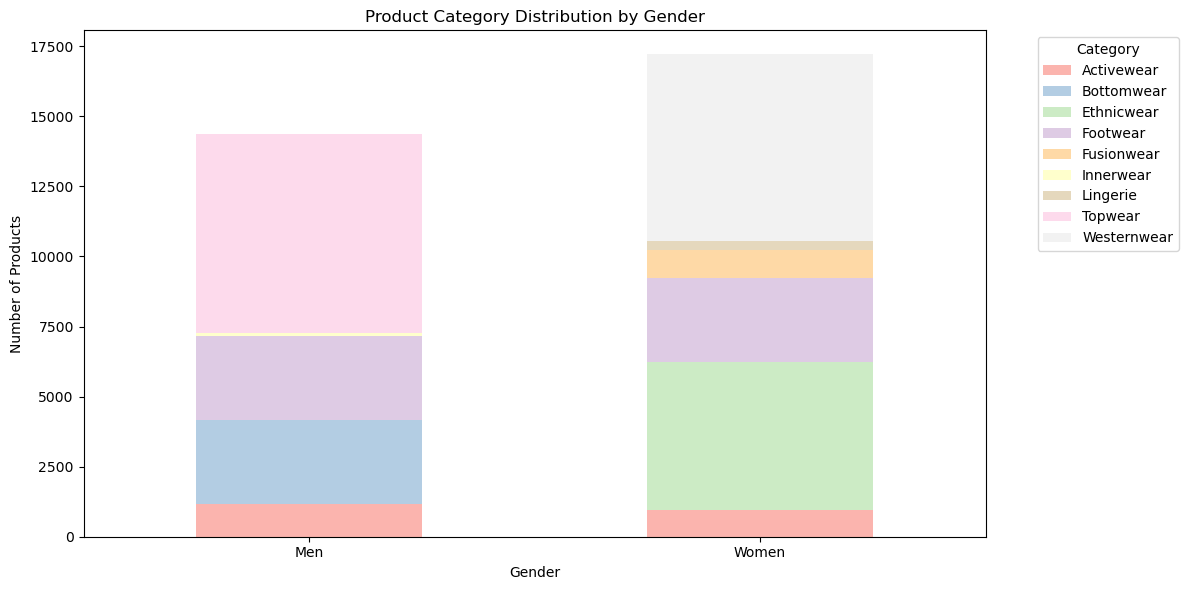

In [105]:
gender_category_counts = df.groupby(['Gender', 'Category']).size().unstack().fillna(0)

gender_category_counts.plot(kind='bar', stacked=True, figsize=(12,6), colormap='Pastel1')
plt.title('Product Category Distribution by Gender')
plt.ylabel('Number of Products')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# gender_category_counts

## 🧠 Insight 

#### Men:
#### - Dominant in Topwear (7,110) and Footwear (3,015)

#### - Strong presence in Bottomwear (2,984)

#### - No products in Ethnicwear, Fusionwear, Lingerie, or Westernwear

#### Women:
#### - Lead in Ethnicwear (5,265) and Westernwear (6,641)

#### - Presence in Activewear (964), Fusionwear (997), and Lingerie (325)

#### - No entries in Topwear or Bottomwear

 

### Brand Preference by Gender (Top 5 per gender)


Top Brands for Men:
                   Brand  count
Gender                        
Men    71     performax   1740
       60       netplay   1698
       46  john-players   1224
       86    teamspirit   1028
       24          dnmx    917

Top Brands for Women:
                          Brand  count
Gender                               
Women  107  avaasa-mix-n-match   1507
       184           performax   1289
       146         hi-attitude   1191
       211                   w   1179
       134                 fig   1110


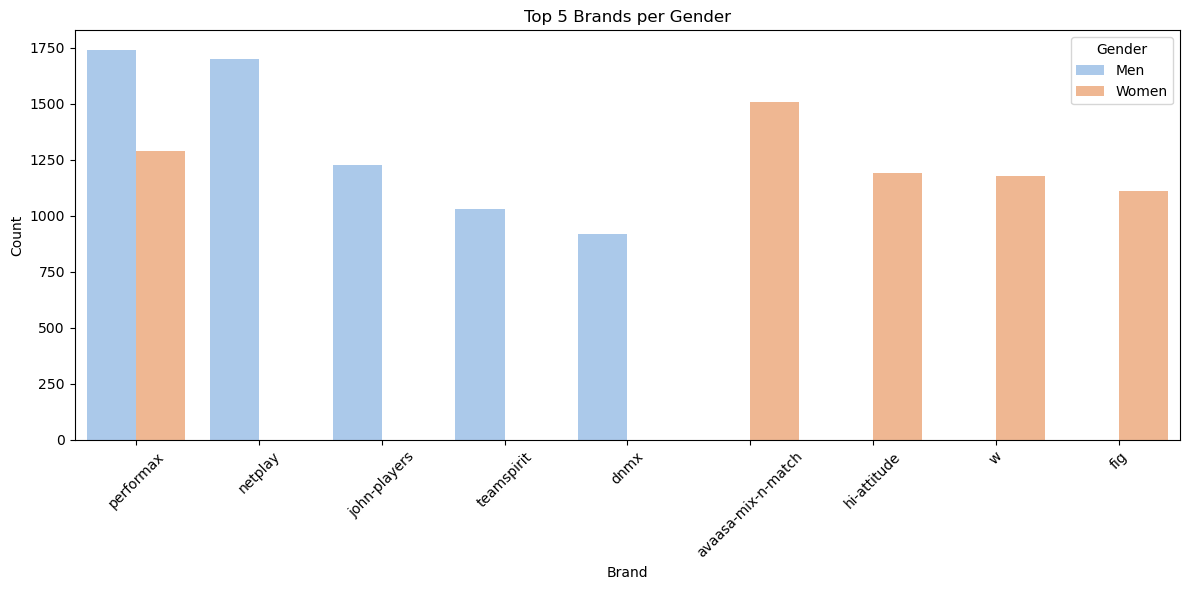

In [109]:
top_brands_per_gender = df.groupby(['Gender', 'Brand']).size().reset_index(name='count')

top_5 = top_brands_per_gender.groupby('Gender').apply(lambda x: x.sort_values('count', ascending=False).head(5))

for gender, group in top_5.groupby(level=0):
    print(f"\nTop Brands for {gender}:\n", group[['Brand', 'count']])


plt.figure(figsize=(12, 6))

# Plot top 5 brands per gender
sb.barplot(data=top_5, x='Brand', y='count', hue='Gender', palette='pastel')

plt.title('Top 5 Brands per Gender')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

## 🧠 Insight 
#### - Men: Performax, Netplay, John Players

#### - Women: Avaasa, Performax, Hi Attitude

#### - Performax is strong for both genders.



# Brand-Level Strategy Profile

### Number of products per brand.

Brand
performax             3029
teamspirit            1908
dnmx                  1757
netplay               1698
avaasa-mix-n-match    1507
john-players          1224
hi-attitude           1191
w                     1179
fig                   1110
lee-cooper             927
ecko                   849
aurelia                842
rio                    753
john-players-jeans     664
ajio                   529
christofano            525
schumann               516
kraus                  510
biba                   485
duke                   429
Name: count, dtype: int64


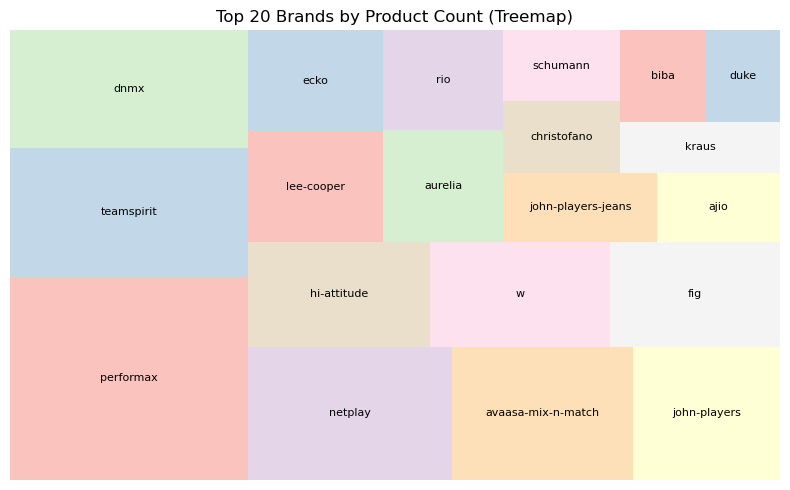

In [114]:
brand_counts = df['Brand'].value_counts()
print(brand_counts.head(20))

#visualization
top_brands = brand_counts.head(20)
plt.figure(figsize=(8, 5))
squarify.plot(sizes=top_brands.values, label=top_brands.index, alpha=0.8, color=plt.cm.Pastel1.colors,text_kwargs={'fontsize': 8})
plt.axis('off')
plt.title("Top 20 Brands by Product Count (Treemap)")
plt.tight_layout()
plt.show()

## 🧠 Insight
#### - Performax has the most products (3029), followed by Teamspirit and DNMX.

#### - Many brands have only 1 product — limited presence.











### How Do Leading Brands Differ in Discounts and Product Focus?

                    Total_Products  Avg_Original_Price  Avg_Discount_Price  \
Brand                                                                        
performax                     3029             1520.56              892.04   
teamspirit                    1908              754.14              513.25   
dnmx                          1757              901.99              538.50   
netplay                       1698             1062.42              680.52   
avaasa-mix-n-match            1507              896.28              513.78   
john-players                  1224             1626.86              869.20   
hi-attitude                   1191              817.14              686.57   
w                             1179             2605.11             1536.66   
fig                           1110              830.22              456.74   
lee-cooper                     927             1887.67             1338.62   

                    Avg_Discount_Percentage Top_Category Gender

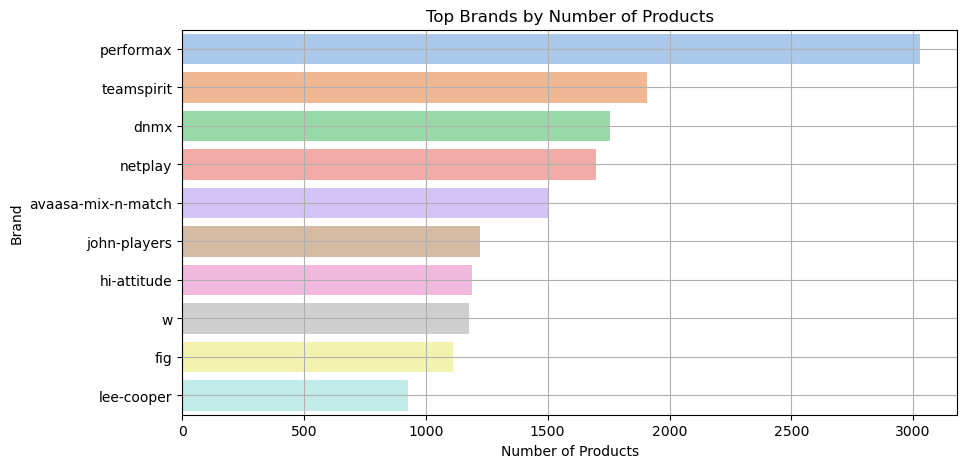

In [118]:
brand_summary = df.groupby('Brand').agg(
    Total_Products=('Product_ID', 'count'),
    Avg_Original_Price=('Original_Price', 'mean'),
    Avg_Discount_Price=('Discount_Price', 'mean'),
    Avg_Discount_Percentage=('Discount_Percentage', 'mean'),
).round(2)


# Top Category by product count
top_category = df.groupby('Brand')['Category'].agg(lambda x: x.value_counts().idxmax())

# Gender focus
gender_focus = df.groupby('Brand')['Gender'].agg(lambda x: x.value_counts().idxmax())

# Combine with main summary
brand_summary['Top_Category'] = top_category
brand_summary['Gender_Focus'] = gender_focus


brand_summary = brand_summary.sort_values(by='Total_Products', ascending=False)
print(brand_summary.head(10))  # Top 10 brands

# Top 10 brands by number of products
plt.figure(figsize=(10, 5))
sb.barplot(data=brand_summary.head(10).reset_index(), x='Total_Products', y='Brand', palette='pastel')
plt.title('Top Brands by Number of Products')
plt.xlabel('Number of Products')
plt.ylabel('Brand')
plt.grid(True)
plt.show()

## 🧠 Insight
#### - Performax leads in product count, focused on Activewear for Men with ~39% discount.

#### - Most top brands (Teamspirit, DNMX, Netplay) target men's casualwear with moderate pricing.

#### - Avaasa and W focus on women's ethnicwear with higher discounts (~40%+).

#### - W has the highest avg. price (₹2605) — a premium women’s brand.


###  Find Number of Unique Products per Brand

                  Brand  Unique_Product_Count
141           performax                  2049
171          teamspirit                  1740
51                 dnmx                  1719
123             netplay                  1684
18   avaasa-mix-n-match                  1470
94         john-players                  1206
75          hi-attitude                  1176
185                   w                  1141
59                  fig                  1091
106          lee-cooper                   916


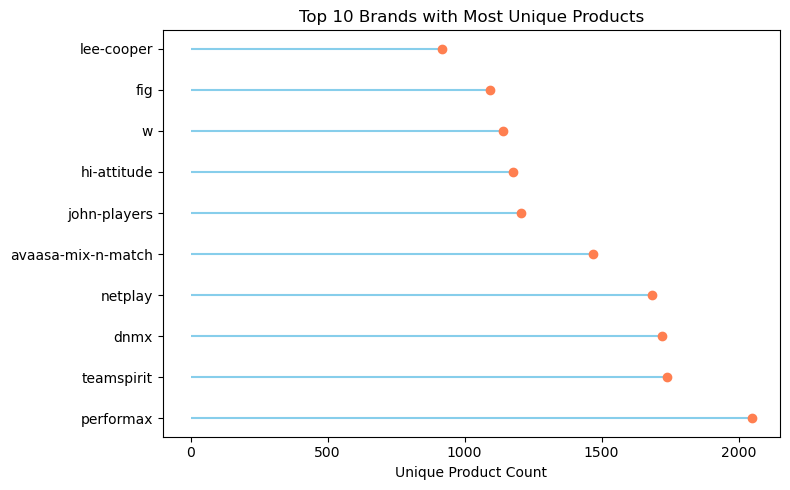

In [122]:
# Count of unique products per brand
unique_products_per_brand = df.groupby('Brand')['Product_ID'].nunique().reset_index()
unique_products_per_brand.columns = ['Brand', 'Unique_Product_Count']

# Display top 10
print(unique_products_per_brand.sort_values(by='Unique_Product_Count', ascending=False).head(10))

#visualization
top10 = unique_products_per_brand.sort_values(by='Unique_Product_Count', ascending=False).head(10)

plt.figure(figsize=(8, 5))
plt.hlines(y=top10['Brand'], xmin=0, xmax=top10['Unique_Product_Count'], color='skyblue')
plt.plot(top10['Unique_Product_Count'], top10['Brand'], 'o', color='coral')

plt.xlabel("Unique Product Count")
plt.title("Top 10 Brands with Most Unique Products")
plt.tight_layout()
plt.show()

## 🧠 Insight
#### - Performax has the most unique products (2049), showing a broad product variety.

#### - Teamspirit, DNMX, and Netplay also offer over 1600 distinct items, indicating strong brand presence.

#### -  Avaasa-Mix-N-Match and W show high diversity in women's wear collections.


###  List of brands that fall under the Mid Price Tier (₹500–₹1499) and offer aggressive discounts

              Brand  Avg_Discount  Product_Count
0          jp-jeans     74.980000              6
1            trends     74.976923             13
2   avaasa-workwear     74.970000              1
3  other-characters     74.966667              3
4           network     71.650455             21
5            outryt     71.495823             78
6       first-class     71.058125             32
7  lee-cooper-women     70.655000             22
8              ajio     70.531111              9
9            svrnaa     69.978657             67


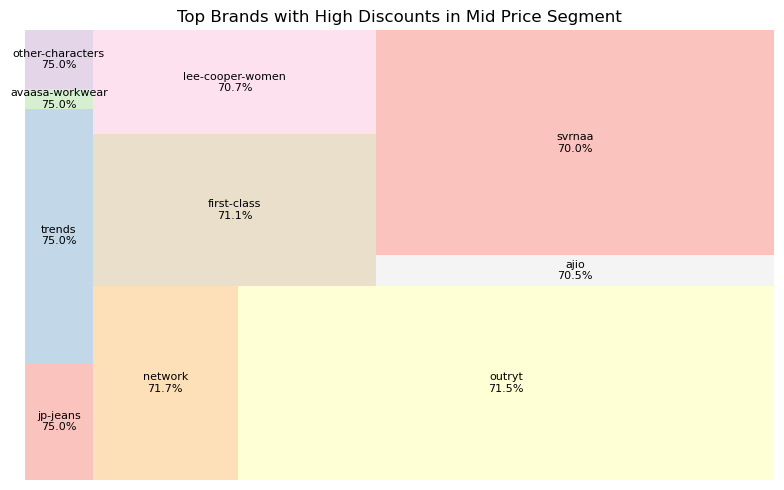

In [126]:
# Filter for mid price tier and high discount
mid_price_aggressive_discount = df[
    (df['Price_Segment'] == 'Mid (₹500–₹1499)') &
    (df['Discount_Percentage'] > 40)
]

# Group by brand and calculate average discount
aggressive_brands = (
    mid_price_aggressive_discount.groupby('Brand')
    .agg(
        Avg_Discount=('Discount_Percentage', 'mean'),
        Product_Count=('Product_ID', 'nunique')
    )
    .sort_values(by='Avg_Discount', ascending=False)
    .reset_index()
)

# Show top brands
print(aggressive_brands.head(10))

#Visualization
top_brands = aggressive_brands.head(10)
sizes = top_brands['Product_Count']
labels = [f"{b}\n{d:.1f}%" for b, d in zip(top_brands['Brand'], top_brands['Avg_Discount'])]

plt.figure(figsize=(8, 5))
squarify.plot(sizes=sizes, label=labels, alpha=0.8,color=plt.cm.Pastel1.colors,text_kwargs={'fontsize': 8})
plt.axis('off')
plt.title("Top Brands with High Discounts in Mid Price Segment")
plt.tight_layout()
plt.show()

## 🧠 Insight
#### - Top mid-price brands like jp-jeans and trends offer very high discounts (~70-75%).

#### - Women-focused brands like Lee-Cooper-Women also give steep discounts.



# Category Deep Dive

### Product count per Gender and Category

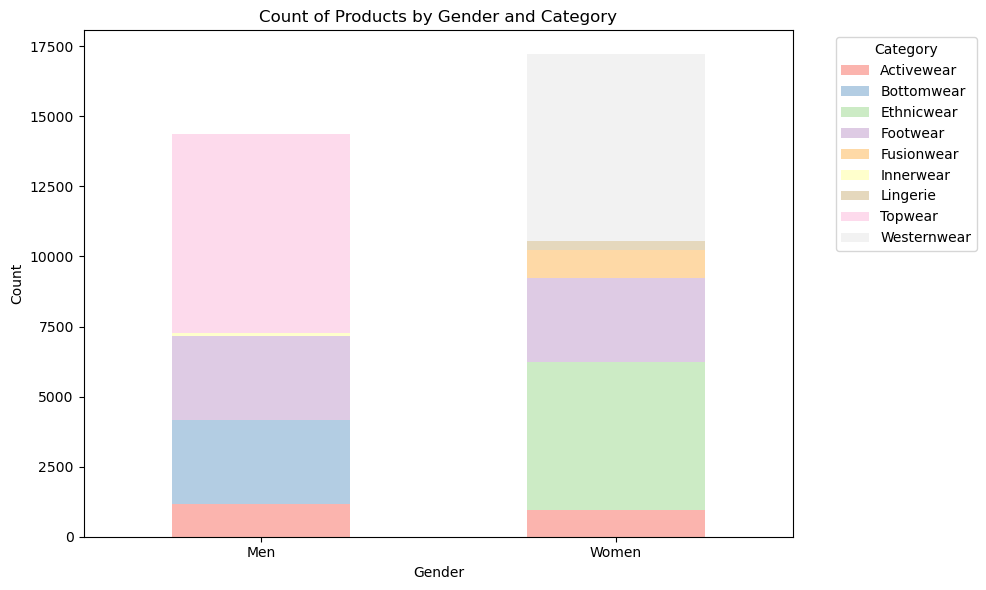

In [132]:
category_gender_count = pd.crosstab(df['Gender'], df['Category'])


# Plot stacked bar chart
category_gender_count.plot(kind='bar', stacked=True, figsize=(10,6),color=plt.cm.Pastel1.colors)

plt.title('Count of Products by Gender and Category')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
# category_gender_count

## 🧠 Insight
#### - Men mainly buy Topwear (7110), Footwear (3015), and Bottomwear (2984).

#### - Women mainly buy Ethnicwear (5265), Westernwear (6641), and Footwear (3015).


#### - Some categories like Lingerie and Innerwear are exclusive to women; Fusionwear only appears for women too.

### Compare average original and discounted prices by category.

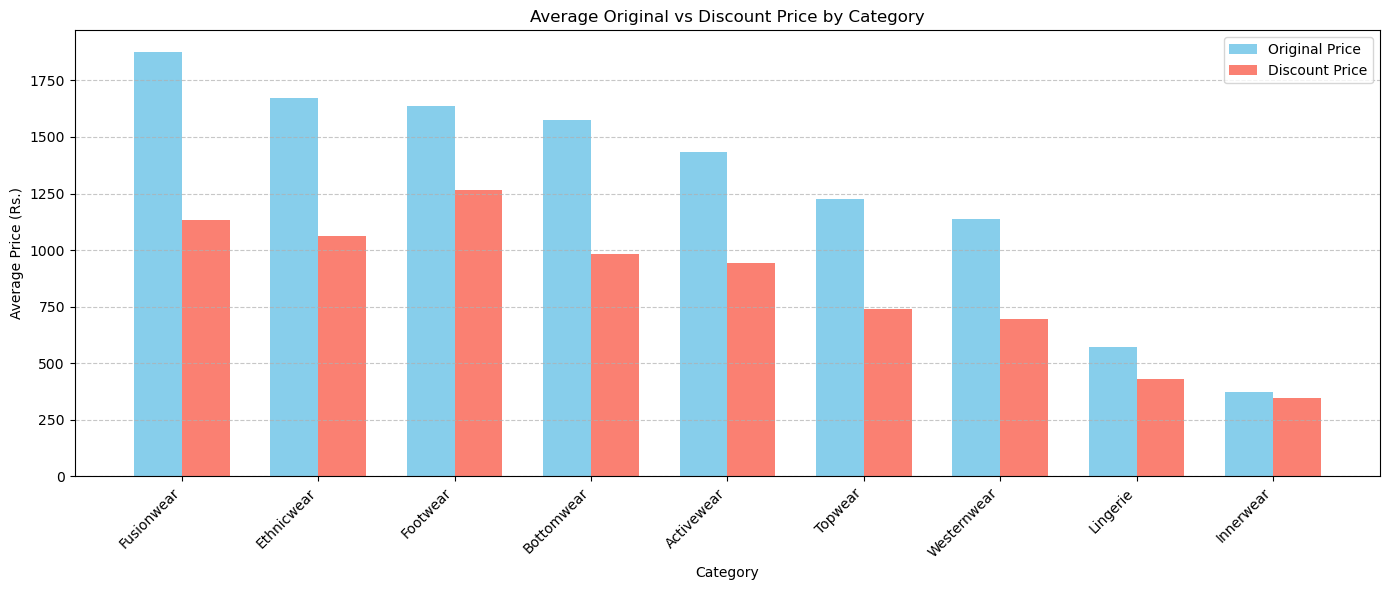

In [136]:
# Calculate average prices by category
vg_prices = df.groupby('Category')[['Original_Price', 'Discount_Price']].mean().sort_values(by='Original_Price', ascending=False)

# Reset index for plotting
vg_prices = vg_prices.reset_index()

# Plot grouped bar chart
plt.figure(figsize=(14, 6))
bar_width = 0.35
categories = vg_prices['Category']
x = range(len(categories))

plt.bar(x, vg_prices['Original_Price'], width=bar_width, label='Original Price', color='skyblue')
plt.bar([p + bar_width for p in x], vg_prices['Discount_Price'], width=bar_width, label='Discount Price', color='salmon')

# Labeling
plt.xlabel('Category')
plt.ylabel('Average Price (Rs.)')
plt.title('Average Original vs Discount Price by Category')
plt.xticks([p + bar_width / 2 for p in x], categories, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# vg_prices

## 🧠 Insight
#### - Fusionwear has the highest average original price (₹1877) and discounted price (₹1134), indicating premium pricing.

#### - Ethnicwear and Footwear also have relatively high prices, showing they are valued categories.

#### - Innerwear and Lingerie have the lowest prices on average, reflecting their budget-friendly nature.

#### - Fusionwear, Ethnicwear, and Footwear have higher original prices.

#### - Topwear and Westernwear are priced lower and show larger price drops after discounts.

### Category-wise Product Count and Average Discount Analysis

Category with product count
 Category
Topwear        7110
Westernwear    6641
Footwear       6030
Ethnicwear     5265
Bottomwear     2984
Activewear     2134
Fusionwear      997
Lingerie        325
Innerwear        96
Name: count, dtype: int64

 Categories by Avg Discount_Percentage
 Category
Westernwear    39.270468
Topwear        37.817540
Fusionwear     36.369258
Bottomwear     36.136394
Ethnicwear     33.613717
Activewear     30.464794
Lingerie       23.462677
Footwear       19.518580
Innerwear       4.835521
Name: Discount_Percentage, dtype: float64


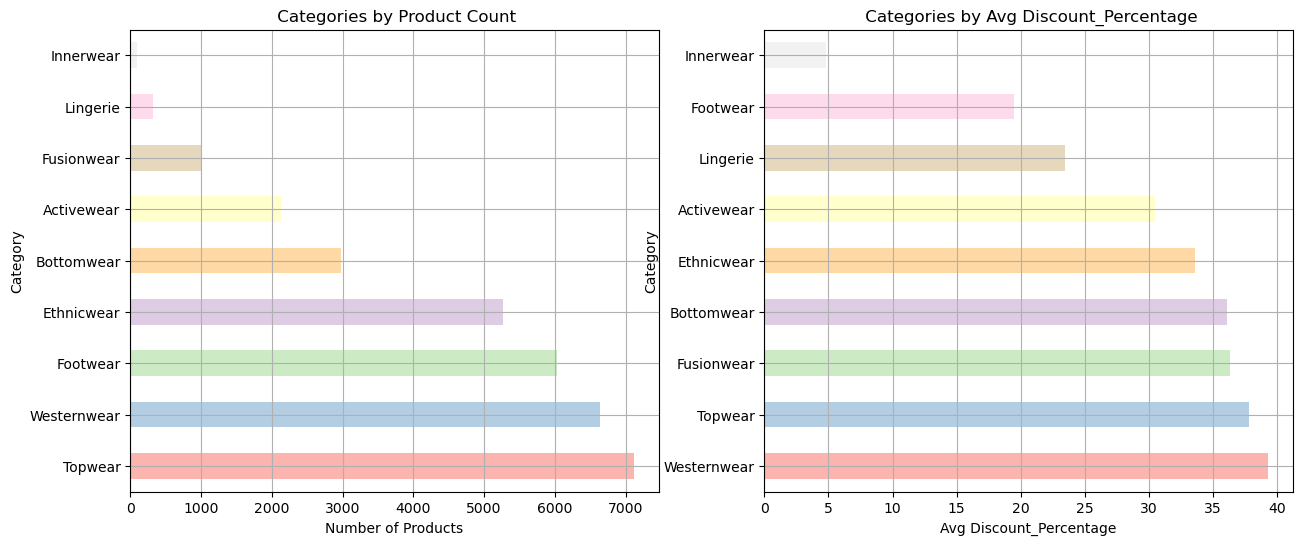

In [140]:
# Count per category
top_categories = df['Category'].value_counts().head(10)
print("Category with product count\n",top_categories)
plt.figure(figsize=(15, 6))

# Plot:  categories by count
plt.subplot(1,2,1)
top_categories.plot(kind='barh',color=plt.cm.Pastel1.colors)
plt.title(' Categories by Product Count')
plt.xlabel('Number of Products')
plt.grid(True)

# Average Discount_Percentage by category
avg_disc_cat = df.groupby('Category')['Discount_Percentage'].mean().sort_values(ascending=False).head(10)
print("\n Categories by Avg Discount_Percentage\n",avg_disc_cat)
# Plot: Avg Discount_Percentage by category
plt.subplot(1,2,2)
avg_disc_cat.plot(kind='barh', color=plt.cm.Pastel1.colors)
plt.title(' Categories by Avg Discount_Percentage')
plt.xlabel('Avg Discount_Percentage')
plt.grid(True)
plt.show()


## 🧠 Insight
#### - Topwear and Westernwear have the highest product counts and also high average discounts (~38-39%).

#### - Fusionwear and Bottomwear offer strong discounts (~36%) despite fewer products.

#### - Innerwear and Footwear have lower discounts (~5% and ~20%), indicating less aggressive pricing.

### Price vs Discount Trend Analysis Across Categories

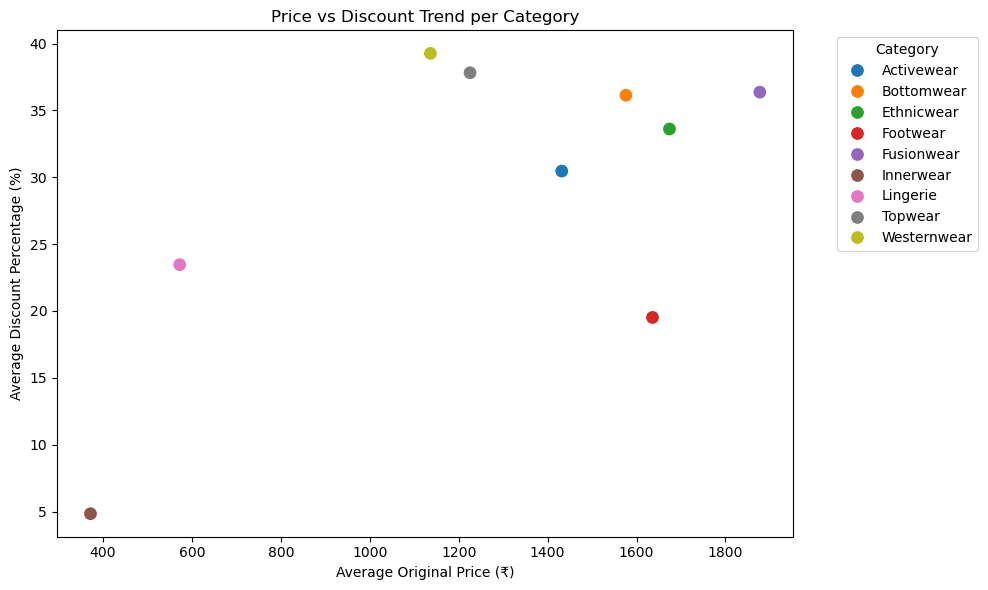

,Category,Avg_Original_Price,Avg_Discount_Percentage
0,Activewear,1431.722587,30.464794
1,Bottomwear,1575.970174,36.136394
2,Ethnicwear,1673.942450,33.613717
3,Footwear,1635.766501,19.518580
4,Fusionwear,1877.246740,36.369258
5,Innerwear,371.614583,4.835521
6,Lingerie,572.243077,23.462677
7,Topwear,1225.362166,37.817540
8,Westernwear,1136.230236,39.270468


In [144]:
# Calculate average original price and discount percentage by category
price_discount_trend = df.groupby('Category').agg(
    Avg_Original_Price=('Original_Price', 'mean'),
    Avg_Discount_Percentage=('Discount_Percentage', 'mean')
).reset_index()

# Plot

plt.figure(figsize=(10,6))
sb.scatterplot(data=price_discount_trend,x='Avg_Original_Price',y='Avg_Discount_Percentage',hue='Category',s=100,palette='tab10')

plt.title('Price vs Discount Trend per Category')
plt.xlabel('Average Original Price (₹)')
plt.ylabel('Average Discount Percentage (%)')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
price_discount_trend

## 🧠 Insight
#### - Premium categories like Fusionwear and Bottomwear have high discounts (~36%).

#### - Westernwear and Topwear offer the highest discounts (~38-39%).

#### - Footwear has moderate price but lower discounts (~20%).

#### - Low-priced Innerwear has minimal discounts (~5%).

# Product-Level Analysis

### Top/Bottom Product Analysis

          Brand                                     Description    Product_ID  \
21728   catwalk                     Chunky-Heeled Slip-On Boots  450144661001   
21652   catwalk       Textured Casual Shoes with Velcro Closure  450132182001   
17334   swadesh         Textured A-line Kurta with Shirt Collar  440824532001   
21073   catwalk                     Boat Shoes with Knot Accent  450144667003   
21063   catwalk                         Animal Print Boat Shoes  450144669001   
24306   swadesh  Front-Open Embroidered A-line Tunic with Inner  440824527002   
17557   swadesh   Banarasi Brocade Angarakha with Surplice Neck  440824528004   
24026   swadesh       Banarasi Brocade Tunic with Attached Slip  440824529003   
19723   swadesh      Textured Panelled Flared Kurta with Tie-Up  440824530003   
6393   buckaroo             Powell Slip-On Leather Casual Shoes  450138977003   

       Discount_Price  Original_Price Gender    Category  Discounted_amount  \
21728             599        

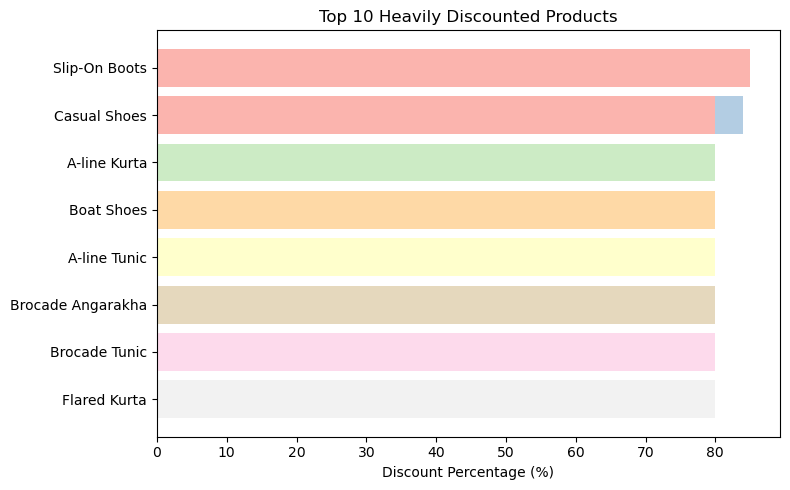

In [149]:
# Top 10 Heavily Discounted Products
top_discounted = df.sort_values(by='Discount_Percentage', ascending=False).head(10)
print(top_discounted)

#visualiztion
plt.figure(figsize=(8, 5))
plt.barh(top_discounted['Product_Name'], top_discounted['Discount_Percentage'], color=plt.cm.Pastel1.colors)
plt.xlabel("Discount Percentage (%)")
plt.title("Top 10 Heavily Discounted Products")
plt.gca().invert_yaxis()  # Highest at top
plt.tight_layout()
plt.show()

## 🧠 Insight
#### - The highest discounts range from 80% to 85%, indicating deep discount tiers (>50% off).

#### - Most discounted products are from Women’s Footwear and Ethnicwear categories.

#### - Brands like Catwalk and Swadesh dominate the top heavily discounted products.

  


###  Least Discounted or Premium Products

In [153]:
#  Least Discounted or Premium Products
premium_products = df[df['Discount_Percentage'] == 0].sort_values(by='Original_Price', ascending=False).head(10)
#visualization
styled_table = premium_products[['Product_Name', 'Brand', 'Original_Price']].style \
    .background_gradient(subset=['Original_Price'], cmap='YlOrBr') \
    .set_caption("Top 10 Full-Price Premium Products")

styled_table


,Product_Name,Brand,Original_Price
19423,Flared Kurta,w,16999
6997,Casual Shoes,k-swiss,14999
6734,Casual Shoes,k-swiss,14999
6966,Casual Shoes,k-swiss,14999
24459,Embellished Gown,w,14999
7012,Casual Shoes,k-swiss,12999
7027,Casual Shoes,k-swiss,12499
7007,Casual Shoes,k-swiss,12499
24162,Lehenga-Choli Set,w,11999
20134,Kurta Set,w,9999


## 🧠 Insight
#### -These products have 0% discount, indicating no price reductions.

#### - Men’s Footwear (brand: K-Swiss) and Women’s Ethnicwear & Fusionwear.


### Top 10 Most Expensive Products

                                             Description    Brand  \
24168  Wishful Embellished Flared Dress with Cape Sle...        w   
19423              Floral Print Embellished Flared Kurta        w   
6966                       Textured Slip-On Casual Shoes  k-swiss   
24459              Embellished Gown with Mandarin Collar        w   
6734             Panelled Casual Shoes with Perforations  k-swiss   
6997                       Panelled Lace-Up Casual Shoes  k-swiss   
18935   Embroidered A-line Kurta with Churidar & Dupatta     biba   
19588                      Wishful Drape-Style Kurta Set        w   
18467                       Embroidered A-line Kurta Set        w   
7012                                Lace-Up Casual Shoes  k-swiss   

       Original_Price    Category      Product_Name  
24168           19999  Fusionwear      Flared Dress  
19423           16999  Ethnicwear      Flared Kurta  
6966            14999    Footwear      Casual Shoes  
24459           14999  F

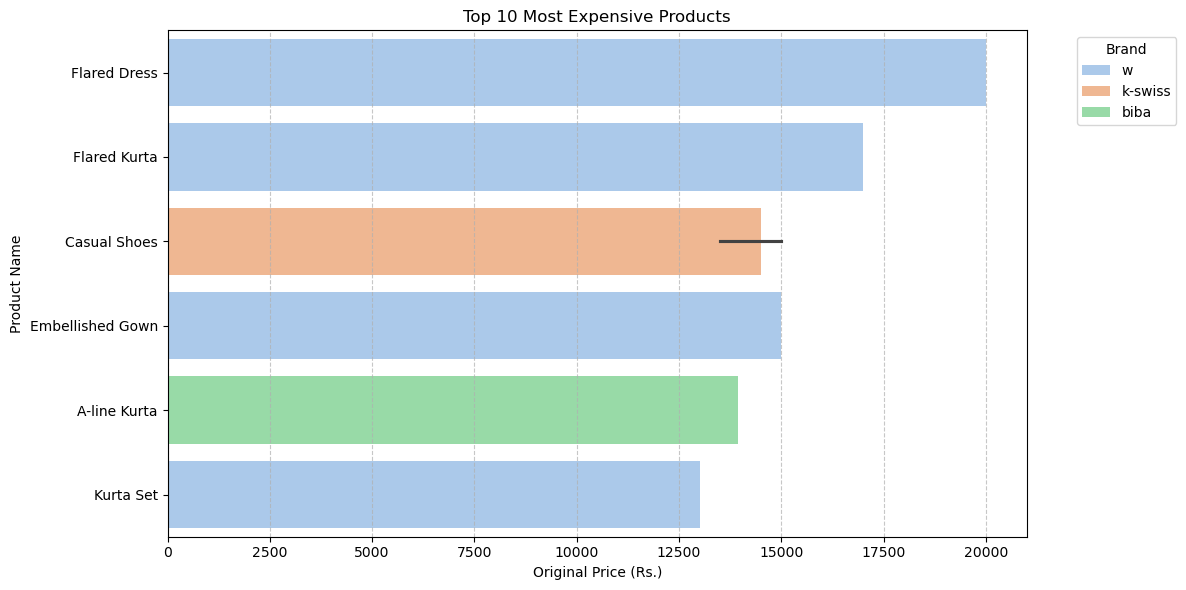

In [157]:
top_expensive = df.sort_values(by='Original_Price', ascending=False).head(10)
print(top_expensive[['Description', 'Brand', 'Original_Price', 'Category','Product_Name']])


# Visualization 
plt.figure(figsize=(12, 6))
sb.barplot(
    data=top_expensive,
    x='Original_Price',
    y='Product_Name',
    hue='Brand',
    dodge=False,
    palette='pastel'
)

plt.title('Top 10 Most Expensive Products')
plt.xlabel('Original Price (Rs.)')
plt.ylabel('Product Name')
plt.legend(title='Brand', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 🧠 Insight
#### - Prices range from ₹12,999 to ₹19,999, highlighting the luxury segment.

#### - Majority belong to Ethnicwear and Footwear categories, with some Fusionwear.

#### - Brands like W, K-Swiss, and Biba dominate the premium price range.

#### - Products include embellished dresses, kurta sets, and casual shoes.



### What is the Distribution of Original Prices and Discounts Across Products?

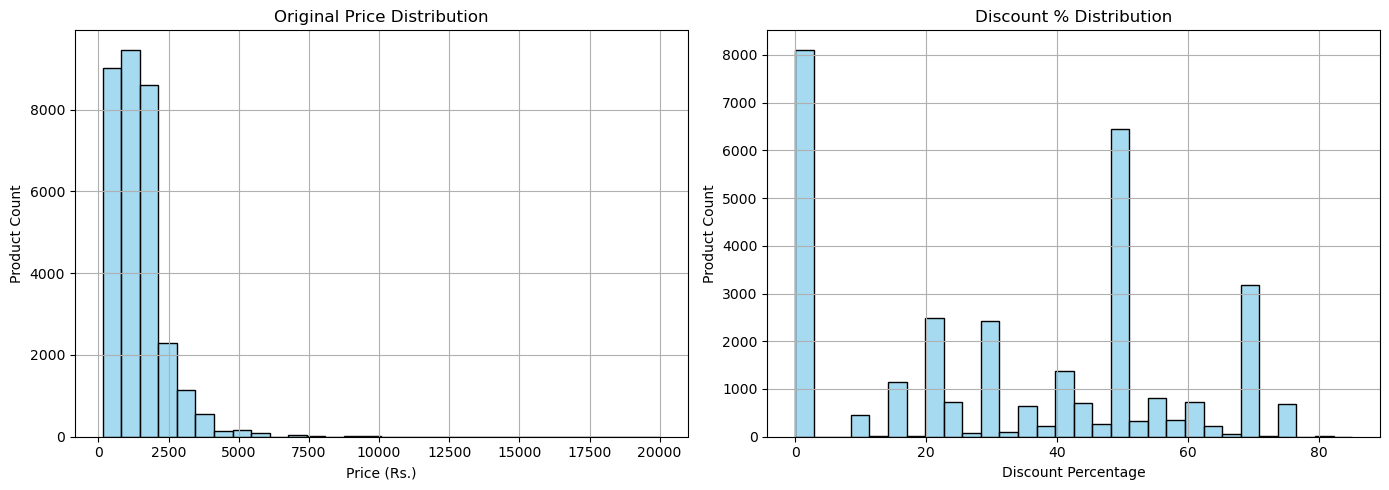

In [161]:

plt.figure(figsize=(14, 5))

# First subplot: Original Price Distribution
plt.subplot(1, 2, 1) 
sb.histplot(df['Original_Price'], bins=30, color='skyblue')
plt.title('Original Price Distribution')
plt.xlabel('Price (Rs.)')
plt.ylabel('Product Count')
plt.grid(True)

# Second subplot: Discount Percentage Distribution
plt.subplot(1, 2, 2)  
sb.histplot(df['Discount_Percentage'], bins=30, color='skyblue')
plt.title('Discount % Distribution')
plt.xlabel('Discount Percentage')
plt.ylabel('Product Count')
plt.grid(True)

plt.tight_layout()
plt.show()

## 🧠 Insight
 #### Original Price Distribution:
#### - Most products are priced below ₹2500, indicating a focus on affordable and mid-range products.

#### - Very few products are priced above ₹5000, showing that luxury items are rare.

####  Discount Percentage Distribution:
#### - A large number of products have no discount.

#### - Significant peaks around 50–70% discounts, showing aggressive pricing to attract buyers.



### Find the most common product type

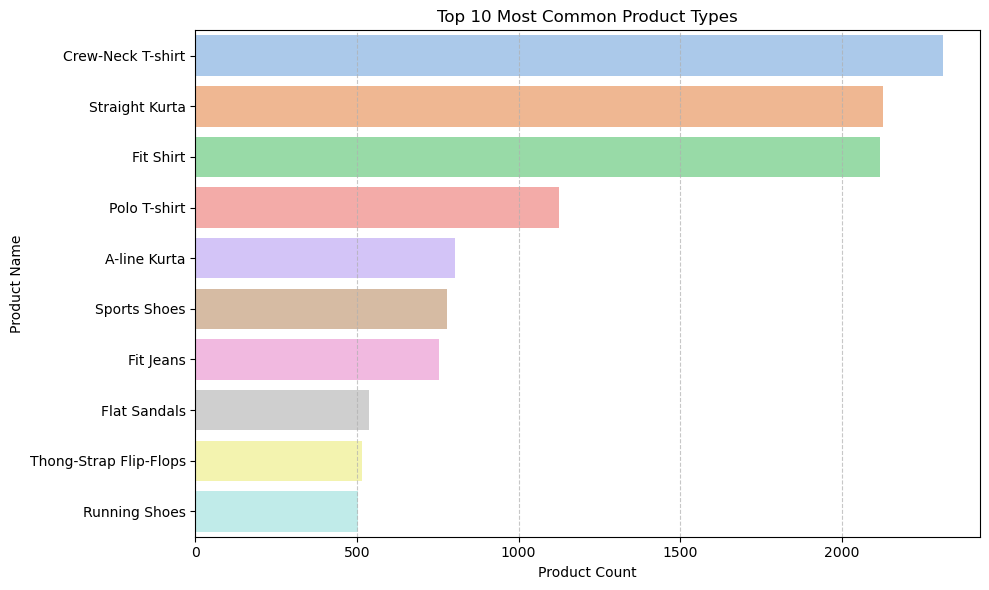

In [165]:
top_products = df['Product_Name'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sb.barplot(x=top_products.values, y=top_products.index, palette='pastel')

plt.title('Top 10 Most Common Product Types')
plt.xlabel('Product Count')
plt.ylabel('Product Name')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
# top_products

## 🧠 Insight
#### - Crew-Neck T-shirt is the most listed product (2312 items).

#### - Straight Kurta and Fit Shirt are also highly common, with over 2100 listings each.

#### - The top products reflect a mix of casual wear (t-shirts, shirts), ethnic wear (kurtas), and footwear (shoes, sandals).



# ML Part

In [169]:
df

,Brand,Description,Product_ID,Discount_Price,Original_Price,Gender,Category,Discounted_amount,Discount_Percentage,Product_Name,Price_Segment,Discount_Tier
0,performax,Typographic Print Track Pants with Insert Pockets,441136763008,974,1299,Men,Activewear,325,25.02,Track Pants,Mid (₹500–₹1499),Moderate (20-40%)
1,performax,Low-Top Lace-Up Sports Shoes,450137679013,1499,1499,Men,Activewear,0,0.00,Sports Shoes,Mid (₹500–₹1499),No Discount
2,teamspirit,Colorblock Crew-Neck T-shirt,441133214008,461,549,Men,Activewear,88,16.03,Crew-Neck T-shirt,Mid (₹500–₹1499),Light (10-20%)
3,performax,Camouflage Print Joggers with Insert Pockets,441134776020,1189,1699,Men,Activewear,510,30.02,Print Joggers,Premium (₹1500–₹3999),Moderate (20-40%)
4,teamspirit,Reflective Colourblock Crew-Neck T-shirt,441136539020,425,599,Men,Activewear,174,29.05,Crew-Neck T-shirt,Mid (₹500–₹1499),Moderate (20-40%)
...,...,...,...,...,...,...,...,...,...,...,...,...
31577,ajio,Printed Top with Raglan Sleeves,460328028004,1299,1299,Women,Westernwear,0,0.00,Printed Top,Mid (₹500–₹1499),No Discount
31578,ajio,Striped Cropped Pants with Belt,460328036004,2099,2099,Women,Westernwear,0,0.00,Cropped Pants,Premium (₹1500–₹3999),No Discount
31579,ajio,Striped City Shorts with Belt,460328005002,1499,1499,Women,Westernwear,0,0.00,City Shorts,Mid (₹500–₹1499),No Discount
31580,ajio,Denim Jacket with Frayed Hemline,460328651009,2999,2999,Women,Westernwear,0,0.00,Denim Jacket,Premium (₹1500–₹3999),No Discount


In [171]:
df = df.drop('Description', axis = 1)

In [173]:
df = df.drop('Product_ID', axis = 1)

In [175]:
df

,Brand,Discount_Price,Original_Price,Gender,Category,Discounted_amount,Discount_Percentage,Product_Name,Price_Segment,Discount_Tier
0,performax,974,1299,Men,Activewear,325,25.02,Track Pants,Mid (₹500–₹1499),Moderate (20-40%)
1,performax,1499,1499,Men,Activewear,0,0.00,Sports Shoes,Mid (₹500–₹1499),No Discount
2,teamspirit,461,549,Men,Activewear,88,16.03,Crew-Neck T-shirt,Mid (₹500–₹1499),Light (10-20%)
3,performax,1189,1699,Men,Activewear,510,30.02,Print Joggers,Premium (₹1500–₹3999),Moderate (20-40%)
4,teamspirit,425,599,Men,Activewear,174,29.05,Crew-Neck T-shirt,Mid (₹500–₹1499),Moderate (20-40%)
...,...,...,...,...,...,...,...,...,...,...
31577,ajio,1299,1299,Women,Westernwear,0,0.00,Printed Top,Mid (₹500–₹1499),No Discount
31578,ajio,2099,2099,Women,Westernwear,0,0.00,Cropped Pants,Premium (₹1500–₹3999),No Discount
31579,ajio,1499,1499,Women,Westernwear,0,0.00,City Shorts,Mid (₹500–₹1499),No Discount
31580,ajio,2999,2999,Women,Westernwear,0,0.00,Denim Jacket,Premium (₹1500–₹3999),No Discount


In [177]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

In [178]:
df.Brand = label.fit_transform(df.Brand)
df.Gender = label.fit_transform(df.Gender)
df.Product_Name = label.fit_transform(df.Product_Name)
df.Price_Segment = label.fit_transform(df.Price_Segment)
df.Discount_Tier = label.fit_transform(df.Discount_Tier)
df.Category = label.fit_transform(df.Category)

In [181]:
df

,Brand,Discount_Price,Original_Price,Gender,Category,Discounted_amount,Discount_Percentage,Product_Name,Price_Segment,Discount_Tier
0,141,974,1299,0,0,325,25.02,1603,2,3
1,141,1499,1499,0,0,0,0.00,1408,2,0
2,171,461,549,0,0,88,16.03,315,2,2
3,141,1189,1699,0,0,510,30.02,1089,3,3
4,171,425,599,0,0,174,29.05,315,2,3
...,...,...,...,...,...,...,...,...,...,...
31577,5,1299,1299,1,8,0,0.00,1144,2,0
31578,5,2099,2099,1,8,0,0.00,346,3,0
31579,5,1499,1499,1,8,0,0.00,232,2,0
31580,5,2999,2999,1,8,0,0.00,369,3,0


In [183]:
x = df.drop(['Original_Price'],axis=1).values
y = df['Original_Price'].values

In [185]:
x

array([[1.410e+02, 9.740e+02, 0.000e+00, ..., 1.603e+03, 2.000e+00,
        3.000e+00],
       [1.410e+02, 1.499e+03, 0.000e+00, ..., 1.408e+03, 2.000e+00,
        0.000e+00],
       [1.710e+02, 4.610e+02, 0.000e+00, ..., 3.150e+02, 2.000e+00,
        2.000e+00],
       ...,
       [5.000e+00, 1.499e+03, 1.000e+00, ..., 2.320e+02, 2.000e+00,
        0.000e+00],
       [5.000e+00, 2.999e+03, 1.000e+00, ..., 3.690e+02, 3.000e+00,
        0.000e+00],
       [5.000e+00, 1.299e+03, 1.000e+00, ..., 8.840e+02, 2.000e+00,
        0.000e+00]])

In [187]:
y

array([1299, 1499,  549, ..., 1499, 2999, 1299], dtype=int64)

In [189]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2 , random_state=42)

In [191]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [193]:
model.fit(xtrain,ytrain)

LinearRegression()

In [195]:
ypred = model.predict(xtest)
ypred

array([ 699., 1499., 1799., ..., 1199.,  899.,  999.])

In [197]:
from sklearn.metrics import r2_score
r2 = r2_score(ytest,ypred)
r2

1.0

In [199]:
from sklearn.ensemble import RandomForestRegressor
modell = RandomForestRegressor()

In [201]:
modell.fit(xtrain,ytrain)

RandomForestRegressor()

In [202]:
ypred_RFR = modell.predict(xtest)
ypred_RFR

array([ 699., 1499., 1799., ..., 1199.,  899.,  999.])

In [203]:
from sklearn.metrics import r2_score
r21 = r2_score(ytest,ypred_RFR)
r21

0.9991928664407765

In [204]:
import xgboost as xgb

In [205]:
modelll = xgb.XGBRegressor()

In [206]:
modelll.fit(xtrain,ytrain)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [207]:
ypred_xgb = modell.predict(xtest)
ypred_xgb

array([ 699., 1499., 1799., ..., 1199.,  899.,  999.])

In [208]:
from sklearn.metrics import r2_score
r211 = r2_score(ytest,ypred_RFR)
r211

0.9991928664407765

In [209]:
print('Linear Regression :',r2)
print('RandomForestRegressor :',r21)
print('XGBRegressor :',r211)

Linear Regression : 1.0
RandomForestRegressor : 0.9991928664407765
XGBRegressor : 0.9991928664407765
